# Facebook Messenger

## Jeffrey Chiu

In [70]:
import os
import json
import numpy as np
import pylab as pl
import datetime
from collections import defaultdict, OrderedDict

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 500000
MESSAGE_THRESHOLD = 10
MESSAGE_BOUND = 100000

In [2]:
os.listdir(CURRENT_DIRECTORY + "/messages/inbox/seanandrewanderson_prcw8jcveq")

['message_1.json']

In [3]:
CURRENT_DIRECTORY

'/Users/jchiu/Desktop/hcs/facebook-message-analyzer'

In [4]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [5]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0

In [6]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message_1.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 752 chats...
seanandrewanderson_prcw8jcveq
PromSquaaad_NDrRVThsCg
AaronLin_tvu-zeM_pg
RyanLee_wqr4jDoanw
ogsquadjeffery_hclbqv8urw
shangjia_ngqfacqvnq
o29wpgnluq
HOrnerBall_oWcT99edNw
catherinecheng_ytrc1vjslw
abhiramrishiprattipati_lbuz1_o99g
elainechan_01ocp8zmzq
ReetVictorandRia_VWxgMffXOw
nancywang_i6frpw5jbw
seanqiu_pu5_dxoqdw
Endgamers_EZzcBpSPTQ
rishikmanthana_pj1epmga6a
mandyko_kkqjoz_oqw
AntonLin_p4PZNSzoBQ
helennguyen_qgzz1-sw5q
derekhwang_wfa2geewla
copperlab_fc-cjxc1ma
edwinandlily_mwg6hxqvia
p-9xqlf8zw
pvkn49qagw
daniellee_onr2sinupa
WeberWong_Uw7JcQ61-w
keerthandiddige_qmlat-iuzq
facebookuser_irn8cg8yjq
SherinLajevardi_HOq_8ee3jA
justinjsmith_mc2k_4k-hw
VictorLi_zGfIYSKqRw
noname_tv3iki1lyq
EthanChen_fjlp0ibUGA
geeschilkebbs33hd_tgv0m0z2-a
brandonye_uy-bs0emag
chuparpene_6nGI8qE1sg
advaitmarathe_g7closptug
abigaillimary_agfx2vpuew
allstate2017_v4WTpoCNtw
felixsanjayemersonandyagnya_ailmqqv-vg
sravyakuchibhotla_i9l5zk3qga
LarryZheng_9JIqeCsQ6w
townofscrib_fcungk9

albertchiang_est6yca1mw
rishiklilyandsherin_vxff-sx3tw
APBioTranspirationLab_fSFrLPnFZA
bart__tknczvvja
armonolaee_nfx1bisgea
seokcess_tcu-tz-r5a
kellyyoo_ivpyyddtqq
Lee_zVHglwyiFw
melodybaculi_twxl674jza
FayeWang_4cil3HZGlw
MachineLearningclub20172018Officer_tSQavLb7AQ
aaronliu_c8zebbetwq
JenniferVictorandSarah_KBb1aPZ50g
KelcieKhinthi_q00BjHKI5A
keiselami_myh0ipr8ka
justindickson_zinmiirfxw
amanmanazir_big_vitkeq
mehdiali_wheebnnswg
grantye_tmsxo7wqdq
NickYao_3AMQX6oaKQ
vaibhavippili_ihuqkibv4q
tanveerrahmannasim_pnic0pgeba
hugefish__rdiu0eplq
taishipainter_r8zqspkfga
alexoropeza_ncwfucpiug
anyaagarwal_af_rljshhq
DingYuhLou_RSpHucH6vQ
tsuchatsktsk_qg68xvglow
ChineseMovieProject_Xard4UvDrw
jonathanchung_f6fgeqgypg
kelseywu_v5cfnjqeqw
masonfriedberg_mi9gef-jfq
imorystals_a2xx6shesg
ChloeRetika_tOrALbvMug
nathanhsieh__qvgxrk_sq
ZiranDing_5EaExvAlUw
EinarBalan_6XrgP4c57A
seniornight_v1po2kteng
maiatrinh_fdq5xt9bga
ganeshsankaran_c6mtfsr1ga
jeremyleung_6q-83gacza
vivianliu_2peen34ylg
Jess

ChattyCathies_4njreWNFWQ
ReetamGanguli_eWHurwhwWw
alanchang_vuzbzpmaaw
Finished processing chats...


In [7]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 57842 messages - LilyYang_NxkA2GnciA
1 - 18383 messages - SherinLajevardi_HOq_8ee3jA
2 - 8922 messages - weeddapeopleMartyParty_voApRT0zaw
3 - 8665 messages - EvolvedTrolling_0B1Q0yk6pA
4 - 5719 messages - Unit5AsianDanceTeam_CFZx6pGiNg
5 - 4816 messages - suffering_3ftyFLlJXQ
6 - 4037 messages - ZiranDing_5EaExvAlUw
7 - 3894 messages - IHSprogrammingclub2018_k_YVHlwxXg
8 - 3245 messages - Temp_acSVSPi5oA
9 - 3177 messages - PRECALCH_yuS0UIsxQQ
10 - 3010 messages - StevenLi_Gz2JSDUjyQ
11 - 2898 messages - flashcards_7zRz7rIZag
12 - 2892 messages - PhysicsClub_5BW1OTrUdA
13 - 2663 messages - welcometo_eUP0Qv_jtA
14 - 2448 messages - Lee_zVHglwyiFw
15 - 2356 messages - BilalPandit_kQhMgzVITg
16 - 2222 messages - 548Geeksquad_P5-_7hLVuQ
17 - 2216 messages - VikramCherukuri_32Hs0ZSwpw
18 - 1947 messages - MachineLearningclub20172018Officer_tSQavLb7AQ
19 - 1813 messages - JaneZhang_bJMaZSy5Wg
20 - 1797 messages - HOrnerBall_oWcT99edNw
21 - 1786 messages - HMCCoaches201819_gyVP3dIFfw
22 

In [44]:
time_diff = defaultdict(dict)
def find_time_differences(times):
    for chat_number in times:
        for person in times[chat_number]:
            hoursum = 0
            times[chat_number][person].sort() 
            for i in range(0, len(times[chat_number][person]) - 1):
                temp = times[chat_number][person][i + 1] - times[chat_number][person][i]
                hoursum += int(temp.total_seconds() / (60 * 60))
            if hoursum > 0.01:
                time_diff[chat_number][person] = hoursum / len(times[chat_number][person])

In [45]:
find_time_differences(final_data_times)

In [46]:
time_diff

defaultdict(dict,
            {0: {'Jeffrey Chiu': 0.25753414206149383,
              'Lily Yang': 0.22650827088441483},
             1: {'Jeffrey Chiu': 1.774074545223254,
              'Sherin Lajevardi': 1.4009871071716358},
             2: {'Isha Bhagavatula': 12.506849315068493,
              'Priyanka Shingwekar': 75.93893129770993,
              'Amy Chen': 56.40718562874252,
              'Rachel Wang': 7.039559014267185,
              'Faye Wang': 22.833333333333332,
              'Varun Vijay': 46.308056872037916,
              'Athithi Janakiraman': 47.61860465116279,
              'Trinity Nguyen': 58.794444444444444,
              'Akshay Gharpure': 16.085536547433904,
              'Kiyomi Blackmun': 34.89007092198582,
              'Chandana Senthil': 49.049751243781095,
              'Facebook User': 24.15989159891599,
              'Sarah Chowdhury': 13.29878869448183,
              'Saisha Singh': 20.468220338983052,
              'Michelle Tran': 25.437299035369776,


In [61]:
time_of_day = defaultdict(dict)
def timeday(times):
    for chat_number in times:
        for person in times[chat_number]:
            for i in range(0, len(times[chat_number][person])):
                time_of_day[chat_number][times[chat_number][person][i].hour] = time_of_day[chat_number].get(times[chat_number][person][i].hour, 0) + 1

In [62]:
timeday(final_data_times)

In [75]:
for i in time_of_day:
    time_of_day[i] = OrderedDict(sorted(time_of_day[i].items()))


In [76]:
time_of_day

OrderedDict([(0,
              OrderedDict([(0, 9323),
                           (1, 9281),
                           (2, 3843),
                           (3, 350),
                           (4, 133),
                           (5, 126),
                           (6, 7),
                           (7, 8),
                           (8, 60),
                           (9, 225),
                           (10, 859),
                           (11, 826),
                           (12, 1009),
                           (13, 1628),
                           (14, 1533),
                           (15, 984),
                           (16, 980),
                           (17, 1843),
                           (18, 2271),
                           (19, 3952),
                           (20, 3797),
                           (21, 3899),
                           (22, 2899),
                           (23, 5335)])),
             (1,
              OrderedDict([(0, 3351),
               

In [77]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()

def plot_time_diff(chat_number):
    plotted_data = time_diff[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Time in hours between messages')
    pl.tight_layout()
    pl.show()
    
def plot_time_of_day(chat_number):
    plotted_data = time_of_day[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'b', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Messages Sent at Each Hour of the Day')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)
    plot_time_diff(chat_number)
    plot_time_of_day(chat_number)

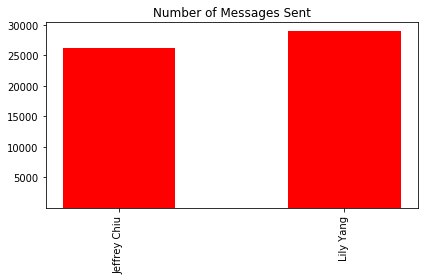

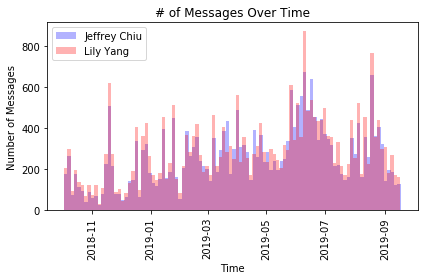

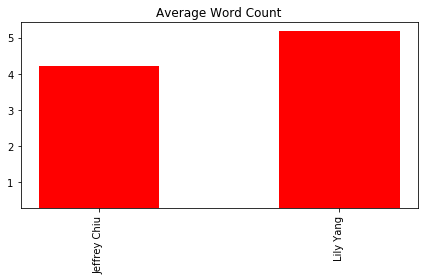

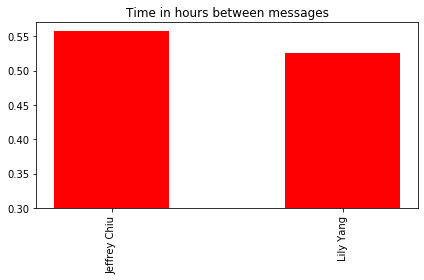

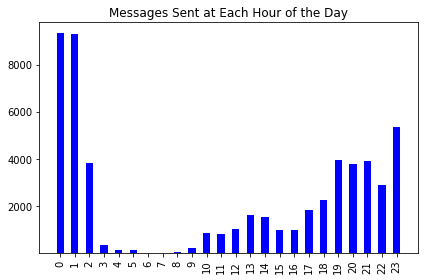

In [78]:
plot(0)